In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# **1. Load Dataset**

In [3]:
#train/test/submission dataset load
train_data = pd.read_csv('/content/drive/MyDrive/데이콘/따릉이/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/데이콘/따릉이/test.csv')
submission_data = pd.read_csv('/content/drive/MyDrive/데이콘/따릉이/submission.csv')

# **2. Introduce Features**

1. id 고유 id
2. hour 시간
3. temperature 기온
4. precipitation 비가 오지 않았으면 0, 비가 오면 1
5. windspeed 풍속(평균)
6. humidity 습도
7. visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
8. ozone 오존
9. pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
10. pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
11. count 시간에 따른 따릉이 대여 수

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [5]:
train_data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [7]:
test_data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


# **3. Visualization**

### **분석 목표**

1. 비가 따릉이 대여에 미치는 영향 분석
2. 기온이 따릉이 대여에 미치는 영향 분석
3. 미세먼지가 따릉이 대여에 미치는 영향 분석
4. 풍속이 따릉이 대여에 미치는 영향 분석
5. 습도가 따릉이 대여에 미치는 영향 분석
6. 시간대가 따릉이 대여에 미치는 영향 분석

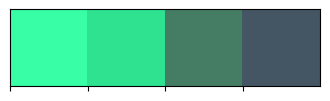

In [12]:
#따릉이 색깔
sns.palplot(['#38FFA5','#2FE290','#447D64', '#445664'])
original_color=['#38FFA5','#2FE290','#447D64', '#445664']

## 1번 목표

In [9]:
rain_1=train_data[train_data['hour_bef_precipitation']==1.0]['hour_bef_precipitation'].count()
rain_0=train_data[train_data['hour_bef_precipitation']==0.0]['hour_bef_precipitation'].count()
print('비가 온 날 횟수 : {}\n비가 오지 않은 날 횟수 : {}'.format(rain_1, rain_0))

비가 온 날 횟수 : 46
비가 오지 않은 날 횟수 : 1411


In [10]:
#따릉이 이용수
rain_total=pd.DataFrame()
states=['clean','rainy']
total=0
for i,state in enumerate(states):
  if i==0:
    total+=int((train_data[train_data['hour_bef_precipitation']==i]['count']).sum())/rain_0
  else:
    total+=int((train_data[train_data['hour_bef_precipitation']==i]['count']).sum())/rain_1
for i,state in enumerate(states):
  if i==0:
    rain_total[str(state)]=[round((int((train_data[train_data['hour_bef_precipitation']==i]['count']).sum())/rain_0)/total,1)]
  else:
    rain_total[str(state)]=[round((int((train_data[train_data['hour_bef_precipitation']==i]['count']).sum())/rain_1)/total,1)]
    
rain_total=rain_total.transpose()[0]

In [11]:
rain_total

clean    0.8
rainy    0.2
Name: 0, dtype: float64

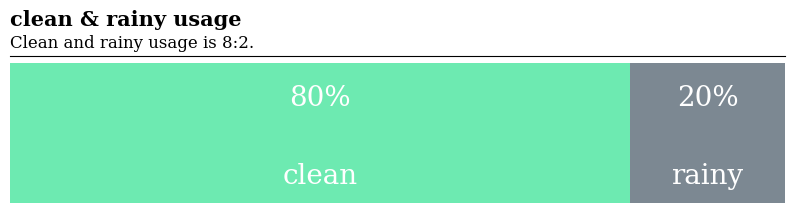

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10, 2))

ax.barh(0.7, rain_total['clean'], 
        color=original_color[1], alpha=0.7, label='clean')
ax.barh(0.7, rain_total['rainy'], left=rain_total['clean'], 
        color=original_color[-1], alpha=0.7, label='rainy')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# clean percentage
ax.annotate(f"{int(rain_total['clean']*100)}%", 
                   xy=(rain_total['clean']/2,0.9),
                   va = 'center', ha='center',fontsize=20, 
                   fontweight='light', fontfamily='serif',
                   color='white')

ax.annotate("clean", 
                   xy=(rain_total['clean']/2, 0.45),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')
    
    
ax.annotate(f"{int(rain_total['rainy']*100)}%", 
                   xy=(rain_total['clean']+rain_total['rainy']/2, 0.9),
                   va = 'center', ha='center',fontsize=20
                   , fontweight='light', fontfamily='serif',
                   color='white')
ax.annotate("rainy", 
                   xy=(rain_total['clean']+rain_total['rainy']/2, 0.45),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'clean & rainy usage', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'Clean and rainy usage is 8:2.',fontfamily='serif',fontsize=12)  

for s in [
  'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

## 2번 목표

In [17]:
train_data['hour_bef_temperature'].value_counts()

18.8    17
19.4    17
14.0    16
18.0    16
16.6    15
        ..
3.2      1
5.3      1
7.6      1
6.3      1
29.2     1
Name: hour_bef_temperature, Length: 245, dtype: int64

In [30]:
temperature_spring=train_data[train_data['hour_bef_temperature']>7.0]['count'].count() - train_data[train_data['hour_bef_temperature']>17.0]['count'].count()
temperature_summer=train_data[train_data['hour_bef_temperature']>17.0]['count'].count() - train_data[train_data['hour_bef_temperature']>22.0]['count'].count()
temperature_fall=train_data[train_data['hour_bef_temperature']>22.0]['count'].count()
temperature_winter=train_data[train_data['hour_bef_temperature']>0.0]['count'].count() - train_data[train_data['hour_bef_temperature']>7.0]['count'].count()
print(
    '평균 기온이 봄철기온인 횟수 : {}\n평균 기온이 여름철기온인 횟수 : {}\n평균 기온이 가을철기온인 횟수 : {}\n평균 기온이 겨울철기온인 횟수 : {}'
    .format(temperature_spring, temperature_summer, temperature_fall, temperature_winter))

평균 기온이 봄철기온인 횟수 : 738
평균 기온이 여름철기온인 횟수 : 448
평균 기온이 가을철기온인 횟수 : 237
평균 기온이 겨울철기온인 횟수 : 34


In [35]:
#따릉이 이용수
temperature_total=pd.DataFrame()
states=['spring','summer', 'fall', 'winter']
for i,state in enumerate(states):
  if i==0:
    temperature_total[str(state)]=[round(temperature_spring/len(train_data),2)]
  elif i==1:
    temperature_total[str(state)]=[round(temperature_summer/len(train_data),2)]
  elif i==2:
    temperature_total[str(state)]=[round(temperature_fall/len(train_data),2)]
  else:
    temperature_total[str(state)]=[round(temperature_winter/len(train_data),2)]
    
temperature_total=temperature_total.transpose()[0]

In [36]:
temperature_total

spring    0.51
summer    0.31
fall      0.16
winter    0.02
Name: 0, dtype: float64

<ipython-input-37-deedc540bb9f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(temperature_total.index, fontfamily='serif')


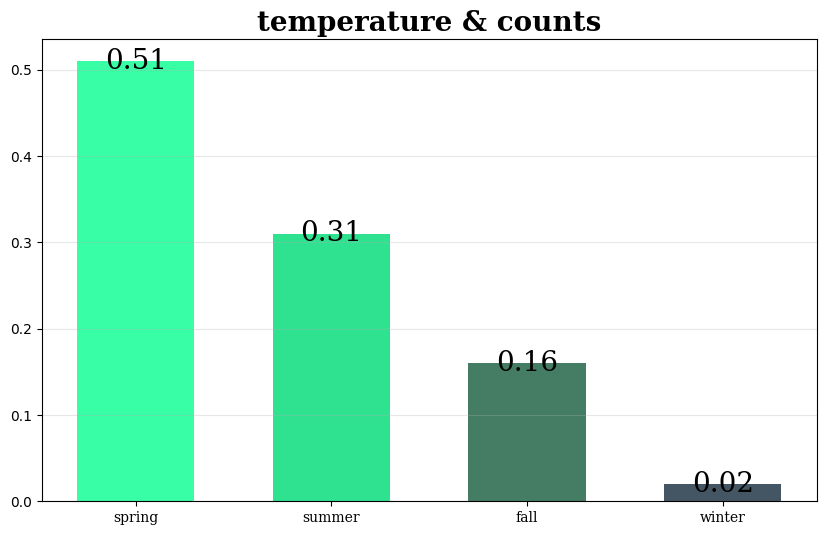

In [37]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
for i,color in enumerate(original_color):
  ax.bar(temperature_total.index[i], temperature_total[i], width=0.60, 
        color=color)

for i in temperature_total.index:
    ax.annotate(f"{temperature_total[i]}", 
                   xy=(i, temperature_total[i]),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=20,
                   color='black')

ax.set_xticklabels(temperature_total.index, fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.3)    
ax.set_title('temperature & counts',fontsize=20,fontweight='bold',fontfamily='serif')
plt.show()